# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---
La materia prima para predecir el precio de las propiedades, son las variables que se encuentran en el data set, como por ejemplo la zona , los metros cuadrados, la cantidad de ambientes, el tipo de propiedad , cada columna provista por el dataset son datos que pueden tener influencia en el precio o no, justamente eso es lo que hay que averiguar

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



---
<div style="background-color: bisque; padding: 10px 10px 10px 10px">
    <h1> Hipótesis</h1>
La presunción que me gustaría poner a prueba es la siguiente: <strong> Existe un sesgo debido a la ubicacion de la propiedad, el modelo de machine learning obtendra una prediccion del precio pero  tendra un error alto debido a que la variable cateogrica de la ubicacion no es tenida en cuenta para el Analisis</strong>



## Importar librerias y cargar dataset

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
#paso 1 : importar librerias y cargar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_properati=pd.read_csv("C:/Users/ACER/Anaconda3/envs/ACAMICA/Library/resources/DS_Proyecto_01_Datos_Properati.csv", sep=",")


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#df_properati.head()
print(df_properati.describe())
#df_properati.shape
#df_properati.dtypes
print("Numpero de filas: " , len(df_properati.index))
print("Numpero de columnas: " , len(df_properati.columns))
df_properati.head(5)


                 lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.0000

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


## Verficar valores faltantes

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
display(df_properati.isna().sum().to_frame())

,0
start_date,0
end_date,0
created_on,0
lat,9925
lon,9959
l1,0
l2,0
l3,0
rooms,0
bedrooms,0


# visualizacion de DATOS

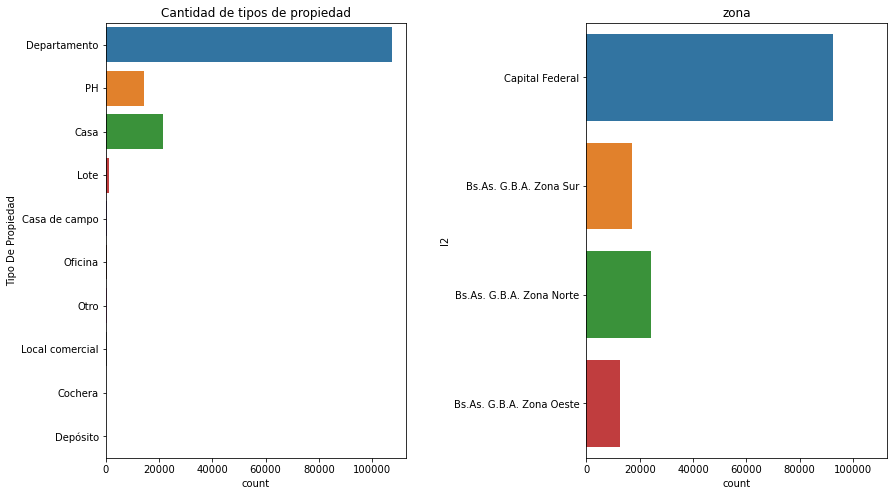

In [4]:
f, axes = plt.subplots(1,2, figsize=(14, 8),sharex=True)
#sns.despine(left=True)
grafico1=sns.countplot(data = df_properati, y = "property_type", orient="h",ax=axes[0])
grafico2=sns.countplot(data = df_properati, y = "l2", orient="h",ax=axes[1])
grafico1.title.set_text('Cantidad de tipos de propiedad')
grafico2.title.set_text('zona')
grafico1.set_ylabel('Tipo De Propiedad')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=0.6)



Text(0.5, 1.0, 'Distribución de tipos de unidades')

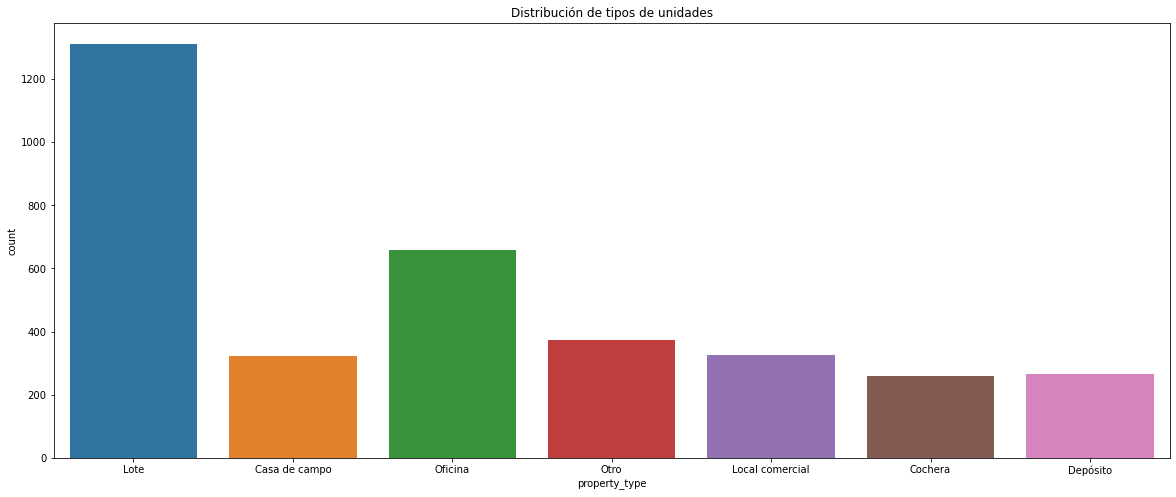

In [5]:
plt.figure(figsize = (20,8))
#plt.subplot(2,1,1)
sns.countplot(x='property_type', data=df_properati[(df_properati['property_type'] != 'Departamento') & (df_properati['property_type'] != 'Casa') & (df_properati['property_type'] != 'PH')]).set_title('Distribución de tipos de unidades')

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
cantidadpropiedades=pd.value_counts(df_properati["property_type"]).to_frame()
cantidadpropiedades
totalpropiedades=pd.value_counts(df_properati["property_type"]).sum()
cantidadpropiedades["Porcentaje"]=cantidadpropiedades["property_type"]/totalpropiedades
print(cantidadpropiedades)


                 property_type  Porcentaje
Departamento            107326    0.731801
Casa                     21521    0.146741
PH                       14298    0.097491
Lote                      1312    0.008946
Oficina                    658    0.004487
Otro                       374    0.002550
Local comercial            325    0.002216
Casa de campo              322    0.002196
Depósito                   265    0.001807
Cochera                    259    0.001766


 # REGIONES A LAS CUALES PERTENECEN LAS PUBLICACIONES

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

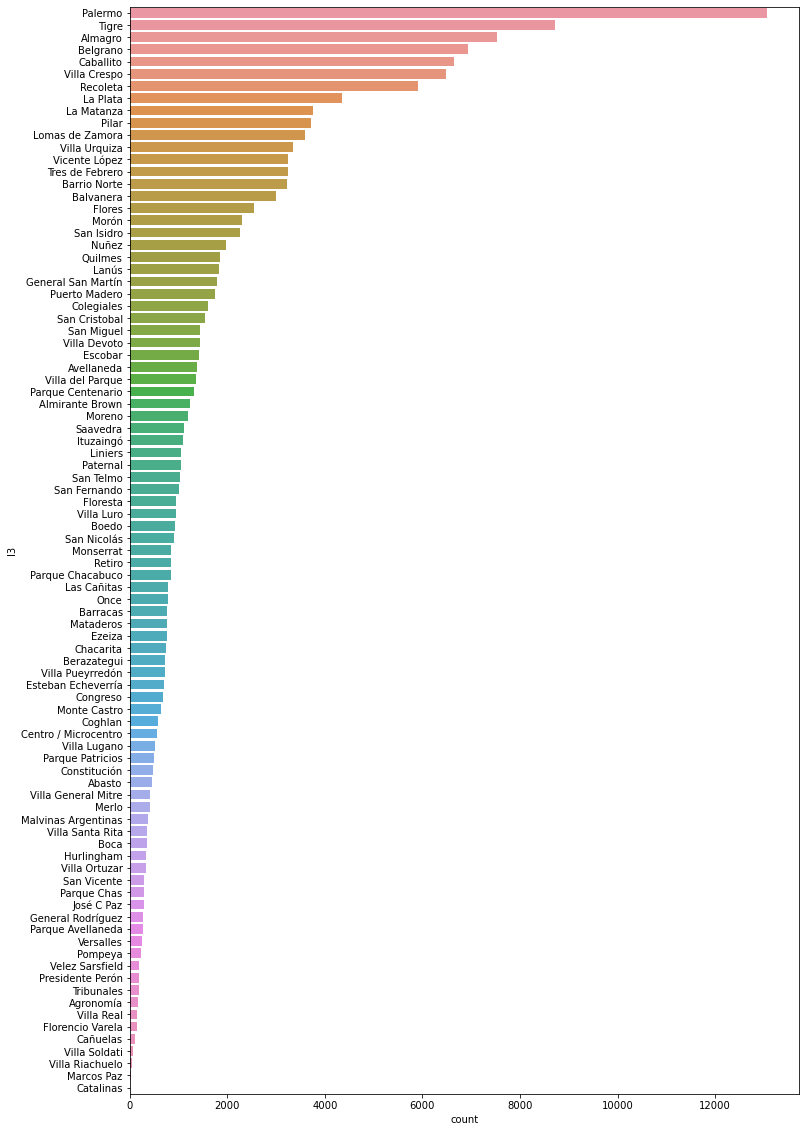

In [7]:
plt.figure(figsize=(12, 20))
descending_order=df_properati["l3"].value_counts().sort_values(ascending=False).index
grafico4=sns.countplot(data = df_properati, y = "l3", orient="h",order=descending_order)


## DATA WRANLING

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

#### PROPIEDADES QUE PERTENECEN A CAPITAL FEDERAL Y SON DEPARTAMENTOS

In [8]:
df_properati2= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="Departamento")]

#### PROPIEDADES QUE PERTENECEN A CAPITAL FEDERAL Y SON CASAS

In [9]:
df_properati3= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="Casa")]

#### PROPIEDADES QUE PERTENECEN A CAPITAL FEDERAL Y SON PH

In [10]:
df_properati4= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="PH")]

#### Casas, departamentos y ph de capital federal

In [11]:

df_properaticoncat=pd.concat([df_properati2,df_properati3,df_properati4])
df_properaticoncat.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

## ELIMINAR OUTLIERS

In [12]:

data=df_properaticoncat[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price","l3","property_type"]]
data.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,San Cristobal,Departamento
11,2.0,1.0,1.0,68.0,59.0,149000.0,Boedo,Departamento
12,2.0,1.0,1.0,50.0,44.0,115000.0,Boedo,Departamento
20,2.0,1.0,1.0,31.0,31.0,75000.0,Abasto,Departamento
21,1.0,1.0,1.0,22.0,22.0,48000.0,Abasto,Departamento


In [13]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


##### Se procede a eliminar outliers ya que las variables numericas presentan una desviacion estandar alta, a continuacion se eliminaran valores atipicos utilizando una funcion que elimina valores por debajo del del primer cuartil multiplicado 1,5 el rango intercuartilico y por encima de Q3 multiplcado 1,5 el rango intercuartilico

## variable surface_covered

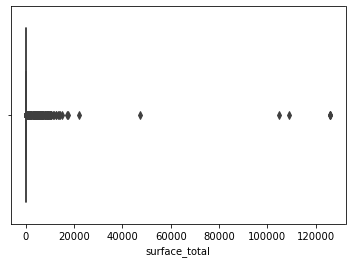

In [14]:

sns.boxplot(data=data,x="surface_total")

In [15]:
data["surface_total"].describe()


count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64

In [16]:
#filtrado con funcion
def remove_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    filters = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
    return df[filters]



In [17]:
#aplicar funcion a surface_total
datafiltrado=remove_outliers(data,"surface_total")


count    76278.000000
mean        78.146058
std         39.968557
min         10.000000
25%         48.000000
50%         67.000000
75%         99.000000
max        204.000000
Name: surface_total, dtype: float64

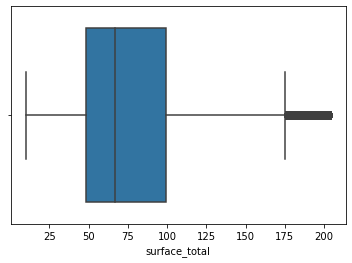

In [18]:
sns.boxplot(data=datafiltrado,x="surface_total")
datafiltrado["surface_total"].describe()

### Variable surface_covered

In [19]:
datafiltrado=remove_outliers(data,"surface_covered")


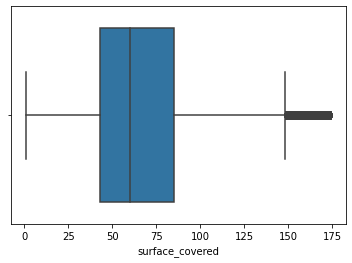

In [20]:
sns.boxplot(data=datafiltrado,x="surface_covered")

### Variable Price

In [21]:
datafiltrado=remove_outliers(data,"price")

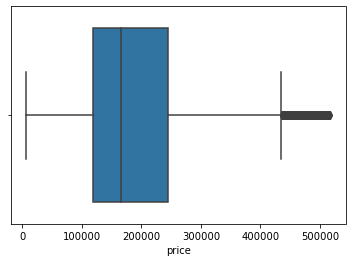

In [22]:
sns.boxplot(data=datafiltrado,x="price")


### Variable rooms, bedrooms, bathrooms

In [23]:
datafiltrado=remove_outliers(data,"rooms")

In [24]:
datafiltrado=remove_outliers(data,"bedrooms")

In [25]:
datafiltrado=remove_outliers(data,"bathrooms")

In [26]:
datafiltrado.shape

(86019, 8)

### eliminar surface covered > surface total

In [27]:
datafiltrado=datafiltrado[datafiltrado["surface_covered"]<=datafiltrado["surface_total"]]
datafiltrado.shape

(77582, 8)


Siguiendo la hipotesis: <strong> se filtraran dos zonas de capital federal, la primera es lugano y la segunda es puerto madero. se hara esto para comprobar como cambia la correlacion de las variables con respecto al precio debido al cambio de la zona</strong>


#### a) LUGANO

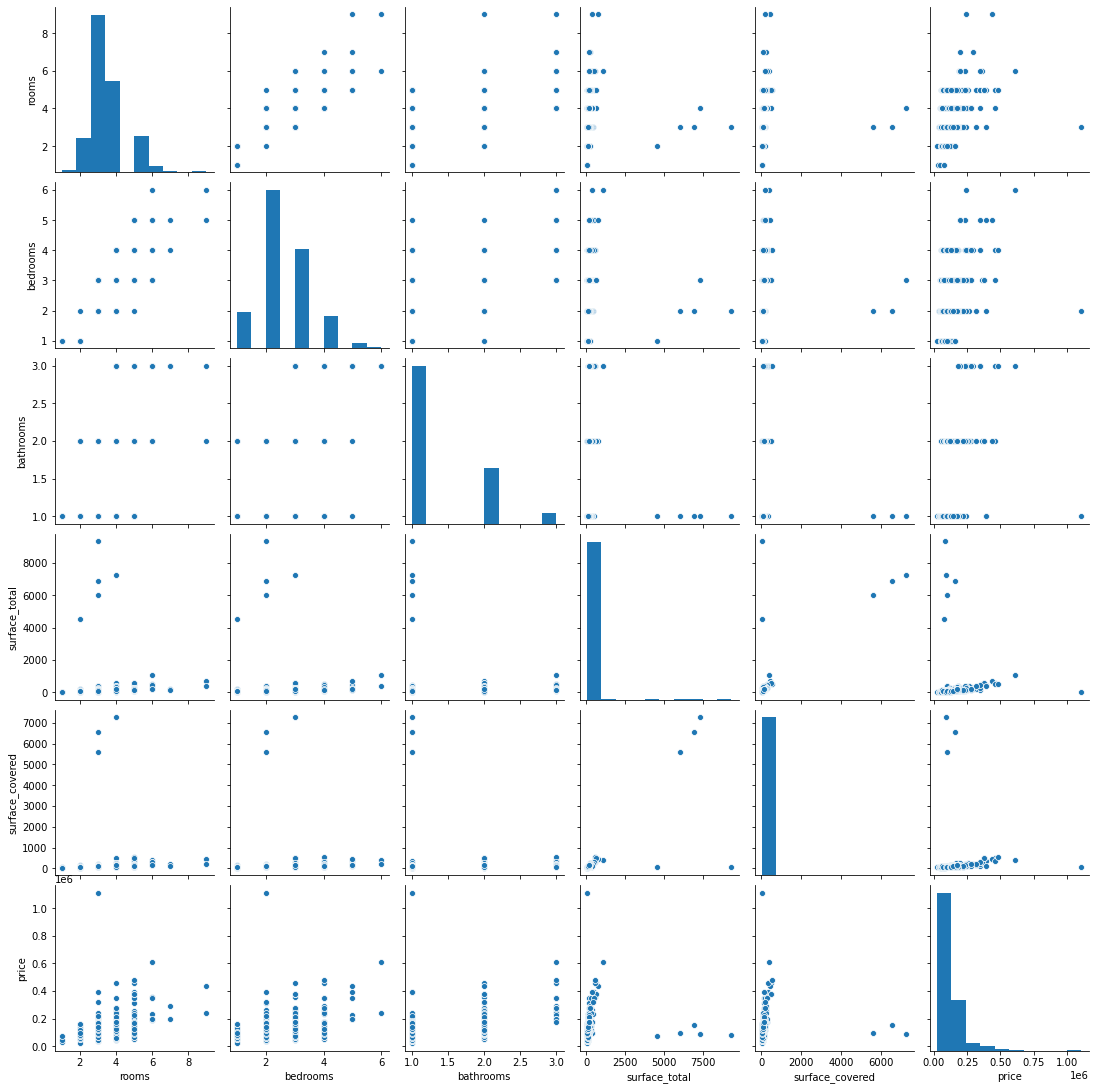

In [28]:
datafiltradolu=datafiltrado[(datafiltrado["l3"]=="Villa Lugano")]
sns.pairplot(datafiltradolu)

#### b) Puerto Madero

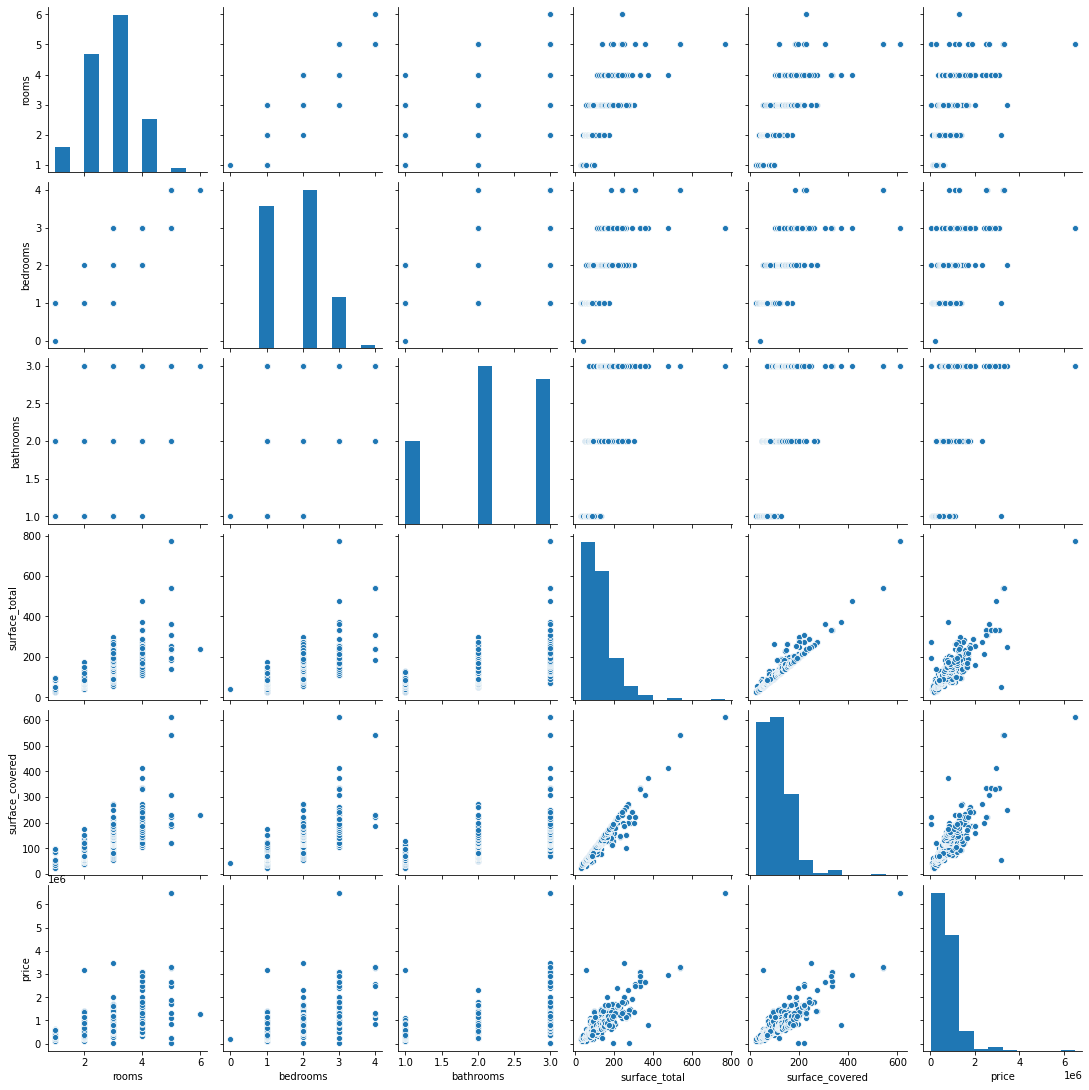

In [29]:
datafiltradopu=datafiltrado[(datafiltrado["l3"]=="Puerto Madero")]
sns.pairplot(datafiltradopu)

### c) palermo

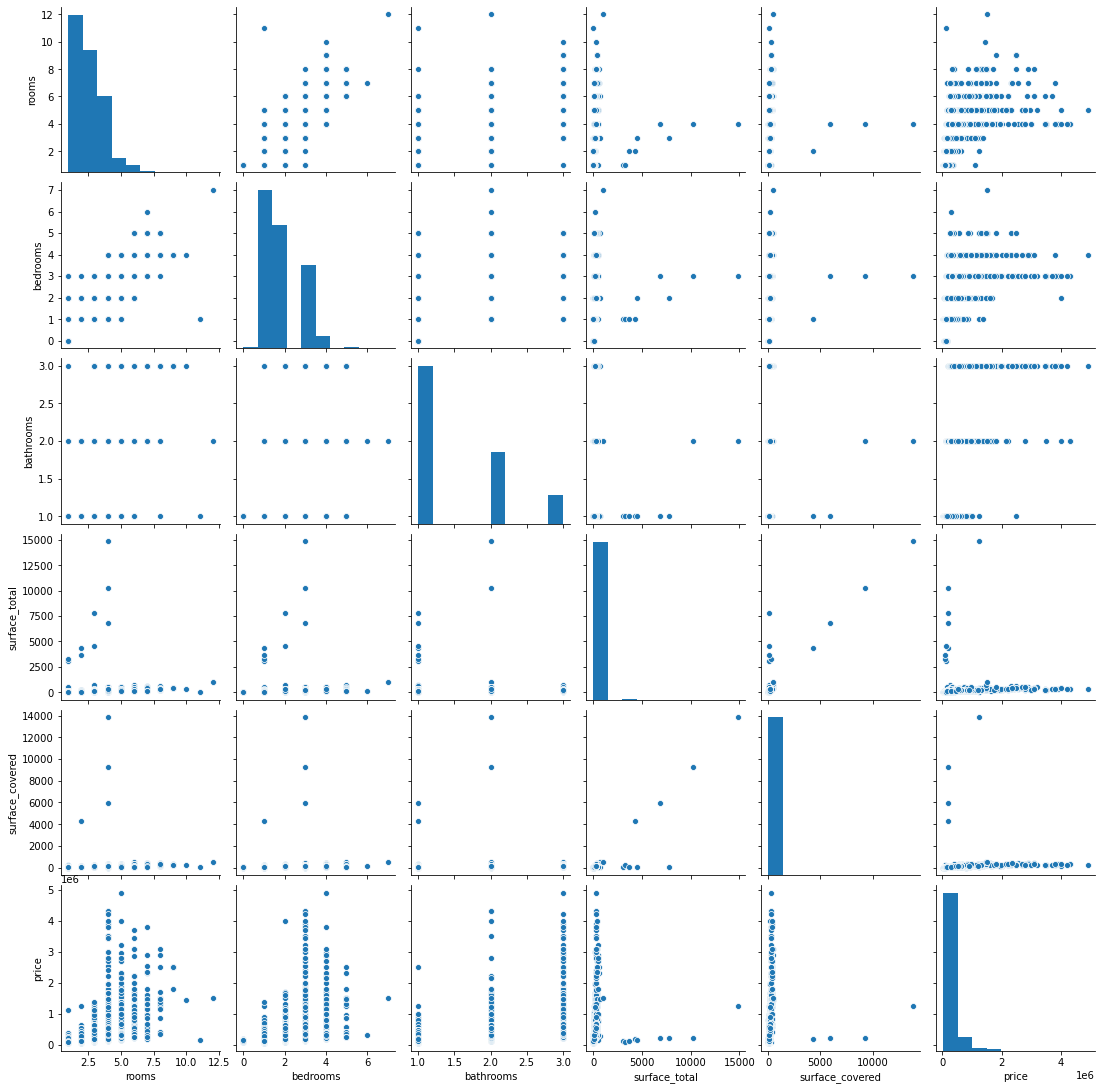

In [30]:
datafiltradopa=datafiltrado[(datafiltrado["l3"]=="Palermo")]
sns.pairplot(datafiltradopa)

#### En los pairplots se observa claramente como cambia la correlacion dependiendo la zona, en puerto madero se obtiene una mayor correlacion entre superficie total y precio comparado con lugano. esta hipotesis se terminara comprobando con los mapas de calor y el modelo de machine learning

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

### ANALISIS DE CORRELACION EN TODO CAPITAL FEDERAL

Text(0.5, 1.0, 'Correlaciones entre variables en relación al PRECIO')

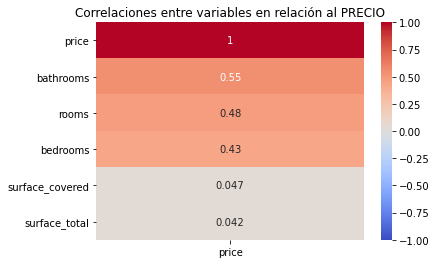

In [31]:
filtrado2 = datafiltrado.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado2[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO')

### ANALISIS DE CORRELACION EN PUERTO MADERO

Text(0.5, 1.0, 'Correlaciones entre variables en relación al PRECIO')

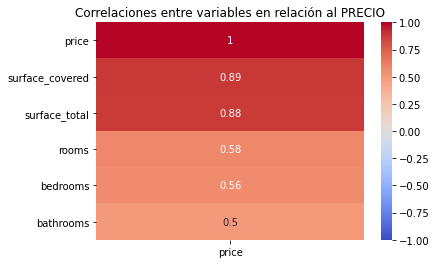

In [32]:
filtrado3 = datafiltradopu.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado3[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO')

## Analisis de correlacion Palermo

Text(0.5, 1.0, 'Correlaciones entre variables en relación al PRECIO')

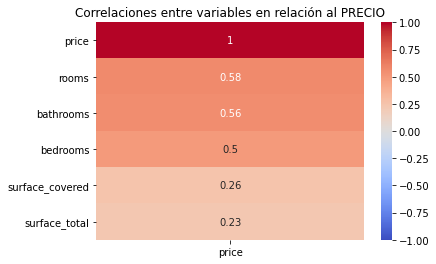

In [33]:
filtrado4 = datafiltradopa.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado4[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO')

## Analisis de correlacion Lugano

Text(0.5, 1.0, 'Correlaciones entre variables en relación al PRECIO')

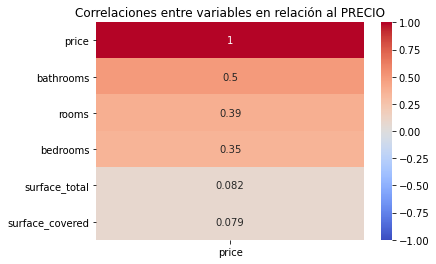

In [34]:
filtrado5 = datafiltradolu.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado5[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO')

#### Conclusiones de las correlaciones obtenidas
-Se observa alto grado de correlacion de las variables bathrooms y rooms a pesar del cambio en la ubicacion, eso se debe a que la mayor cantidad de propiedades son departamentos.En cambio en las casas la superficie cubierta tiene mayor impacto en el precio del inmueble.

-Otra conclusion es que en las zonas de mayor poder adquisitivo como palermo y puerto madero, aumenta el coeficiente de correlacion de la variable surface covered ya que al ser zonas caras el metro cuadrado construido tiene un valor mas alto. podria haber una relacion de causalidad entre surface covered y precio.


### A continuacion se agruparan las variables en grupo, el grupo sera por tipo de propiedad, para verificar que las variables mas influyentes en el precio. Ademas de haber verificado como cambia la correlacion debdiado a la zona tambien se verificara como cambia de acuerdo al tipo de propiedad.

### a) agrupadas por tipo de propiedad

In [35]:
df_property_type=datafiltrado.groupby("property_type")

Text(0.5, 1.0, 'Correlaciones entre variables en relación al PRECIO')

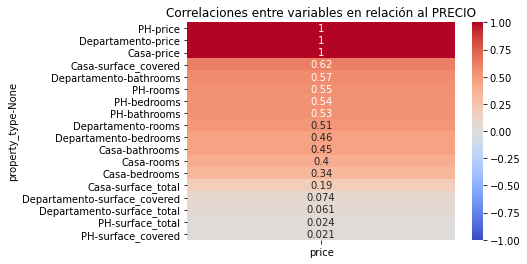

In [36]:
filtrado4 = df_property_type.corr() #obtengo un dataframe de correlatividades entre variables
sns.heatmap(filtrado4[['price']].sort_values(by=['price'], ascending= False),    # grafico el dataset de correlatividades en función de precio
            vmin=-1, 
            cmap='coolwarm',
            annot= True).set_title('Correlaciones entre variables en relación al PRECIO')

### Se concluye que el tipo de propiedad es determinante para predecir el precio, por ejemplo si la propiedad es una casa es mas determinante la superficie cubierta, en cambio si es un departamento es mas determinante la cantidad de rooms y bathrooms.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


### La hipotesis propuesta para el desafio es determinar un sesgo debido a que la mayor concentracion de propiedades se encuentran en las zonas de mayor poder adquisitivo como Palermo y Belgrano, esto se confirmara analizando la distribucion del precio y visualizando los porcentajes

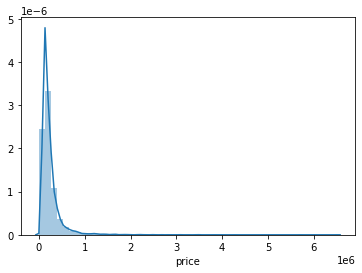

In [37]:

sns.distplot(datafiltrado["price"])

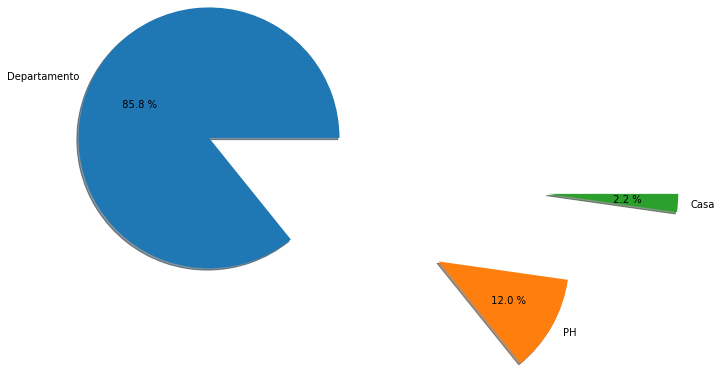

In [38]:
property_counts=datafiltrado["property_type"].value_counts()
plt.pie(property_counts.values, labels=property_counts.index, autopct="% 0.1f %%", shadow=True, radius=1.5, explode=[1,2,3])
plt.show()


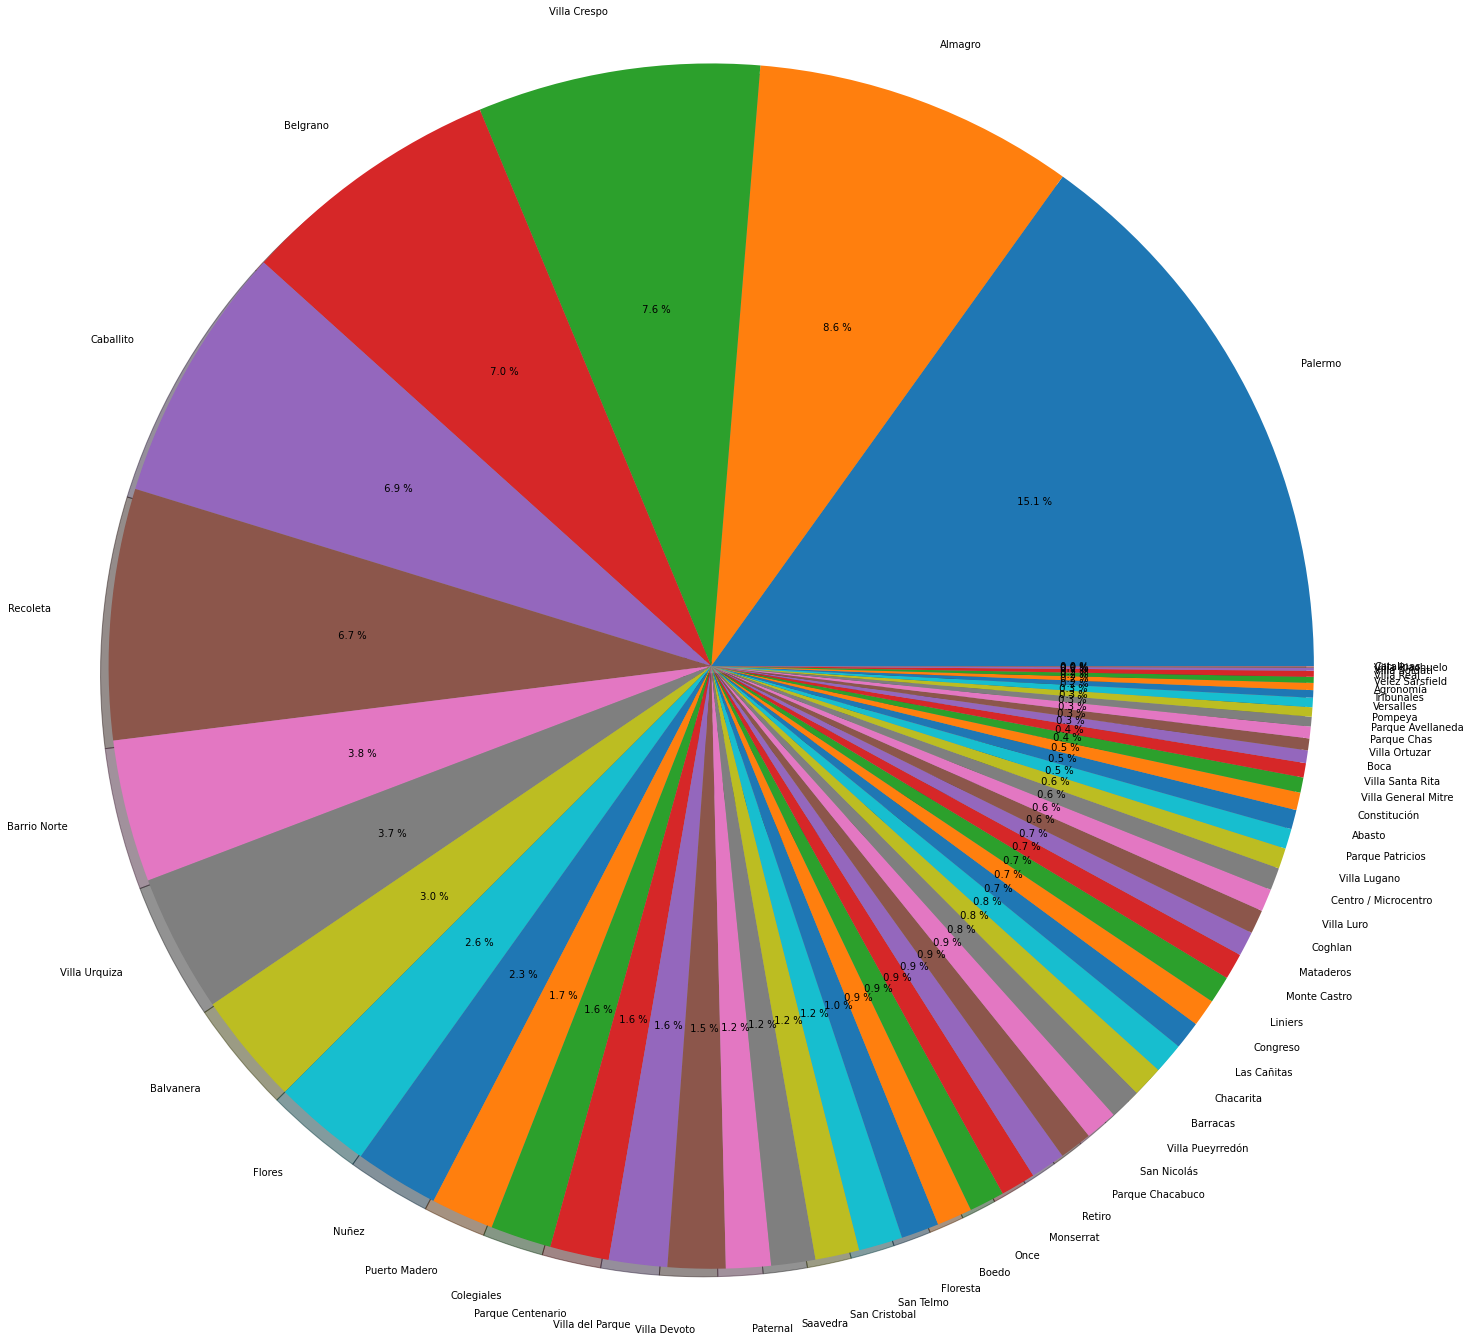

In [39]:
zona_counts=datafiltrado["l3"].value_counts()
plt.figure(figsize=(18, 20))
plt.pie(zona_counts.values, labels=zona_counts.index, autopct="% 0.1f %%", shadow=True, radius=1.5)
plt.show()

### Conslusiones:
-Se confirma la hipotesis planteada en el desafio ya que hay un claro sesgo debido a que la mayor cantidad de publicaciones publicadas corresponden a la zonas mas caras de capital federal.Y tambien que las propiedades corresponden la mayor parte a departamentos. por lo cual se puede afirmar que el modelo a realizar sera util para departamentos que corresponden a las zonas de mayor adquisitivo. No recomiendo utilizar el modelo para predecir otro tipo de propiedades en otras zonas.

-Otra conclusion es que esta inmobiliaria a la hora de asignar vendedores debera asignar los mejores vendedores a la zona de Palermo ya que es donde obtendra el mayor beneficio en comisiones.


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### A continuacion se desarollaran los modelos para obetener las predicciones de los precios solicitados. 
La Metrica utiliza para evaluar cuantitativamente el desempeño de los modelos fue el error cuadratico medio, conocido como MSE o RMSE, para el caso comparativo tomaremos como iguales al MSE Y EL RMSE (hago esta aclaracion porque en los graficos dice RMSE, y enrealidad es MSE).
El error cuadratico medio se define como el cuadrado de la diferencia entre el valor predicho y el valor real, por lo cual mientras mejor desempeño tenga el modelo, menor debera ser el MSE. 
La otra metrica utilizada para modelos donde las variables utilizadas son numericas continuas, es el error absoluto medio, se decidio no utilizar esta metrica para evaluar los modelos ya que tiene como similitud que considera la diferencia entre el valor predicho y el valor real, pero al no estar elevado al cuadrado la diferencia, penaliza de igual manera a los valores que se alejan del valor real, en cambio el MSE los valores mas lejanos a la realidad se hacen mas notorios al estar elevados al cuadrado.

In [40]:
datam=df_properaticoncat[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
datam= datam[(datam["surface_total"]<=1000) & (datam["surface_total"]>=15)]
datam= datam[(datam["price"]<=4000000)]
datam=datam[["rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
#df_properati2= df_properati[(df_properati["l2"]=="Capital Federal") & (df_properati["property_type"]=="Departamento")]

In [41]:
datam.shape

(82373, 6)

In [42]:
datamp=datam.dropna(axis=0, how="any")

In [43]:
datamp.shape

(81019, 6)

### MODELO BENCHMARK

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
predictors = datamp[["rooms","surface_covered","bathrooms"]]
target = datamp["price"]
X = predictors
y = target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 3) (56713,) (24306, 3) (24306,)


In [46]:
linear_model = LinearRegression()

In [47]:
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

[ 28281.7642055     200.38378377 186909.72585363] -128909.72265482903


In [48]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
rmse

229989.21101927193

In [50]:
#%matplotlib inline
#data.plot(kind = "scatter", x = "rooms", y ="price")
#plt.plot(datafiltrado["rooms"],y_test_pred , c="red", linewidth = 2)

## Modelo de arbol de decision

In [51]:

predictors = datamp[["rooms","surface_covered","bathrooms"]]
target = datamp["price"]
X = predictors
y = target

#### se elige como variales predictores estas tres debido a que poseen la mayor correlacion analizada previamente (para ambos modelos)

In [52]:
#importancion de arbol
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [53]:
#division de muestra en train y test
from sklearn.model_selection import train_test_split
#X=X.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 3) (56713,) (24306, 3) (24306,)


In [54]:
#entrenamiento de arbol
regtree = DecisionTreeRegressor(max_depth=10, random_state=42)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [55]:
#Prediccion de arbol
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
rmse

155382.05401682723

In [57]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
depth = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for d in depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    regtree =tree.DecisionTreeRegressor(max_depth=d, random_state=0)
    
    # Entrenar el modelo
    regtree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = regtree.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = regtree.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

Text(0.5, 1.0, 'RMSE / Grados de profundidad')

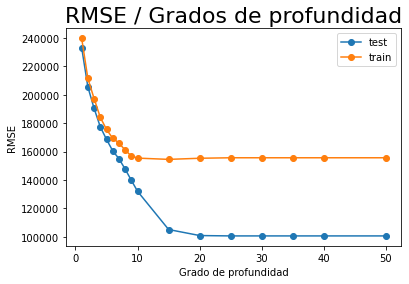

In [58]:
plt.plot(depth,lista_accuracy_test,'o-',label='test')
plt.plot(depth,lista_accuracy_train,'o-',label='train' )
plt.legend()
plt.xlabel('Grado de profundidad')
plt.ylabel('RMSE')
plt.title('RMSE / Grados de profundidad', size=22)

#### La eleccion en la profundidad del arbol es correcta ya que con 10 de profundidad se evita el overfitting y posee un error minimo, ademas que  la distancia se minimiza entre train y test lo cual indica que disminuye la posibilidad de overfitting

## Vecinos mas cercanos

In [59]:
from sklearn.neighbors import KNeighborsRegressor
k = 3
# Creamos el regresor
rg_knn = KNeighborsRegressor(n_neighbors=k)
# Lo entrenamos
rg_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [60]:
#Predecimos
y_train_pred = rg_knn.predict(X_train)
y_test_pred = rg_knn.predict(X_test)

In [61]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
knn = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]
i=0
# Generamos en loop sobre los distintos valores de k 
for k in knn:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    mse = mean_squared_error( y_train, y_train_pred )
    test_rmse = np.sqrt(mse)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mse)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_rmse)
    lista_accuracy_test.append(test_rmse)

Text(0.5, 1.0, 'RMSE / Número de vecinos')

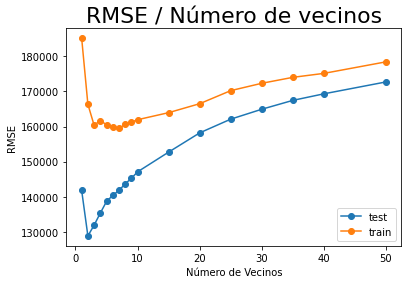

In [62]:
plt.plot(knn,lista_accuracy_test,'o-',label='test')
plt.plot(knn,lista_accuracy_train,'o-',label='train' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RMSE')
plt.title('RMSE / Número de vecinos', size=22)

### La eleccion de k=3 es acertada ya que se minimiza el error de train y test. podria haber un riesgo de sobre ajuste debido a la distancia entre train y test

#### CONCLUSION DE ELECCION DE HIPERPARAMETROS DE LOS MODELOS

Se realizo una eleccion de los hiperparametros optimos para cada modelo, para poder obtener una comparacion realista de los modelos. Se utilizo la eleccion del hiperparametro que minimice el error de test, esto quiere decir que el dato predicho se acerca mas a la realidad es decir posee menos sesgo el modelo. pero por otro lado tenemos la varianza que tiene una relacion de compromiso con el sesgo, entonces ademas de minimizar el sesgo, se debe mimizar el error total del modelo. Por lo cual ademas de elegir el error que minimice el error de test, se selecciono la menor distancia entre test y train para asi minimizar la varianza y evitar overfitting.





## COMPARACION DE MODELOS

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 100530.28460807404
Raíz del error cuadrático medio en Test: 155596.28468384154


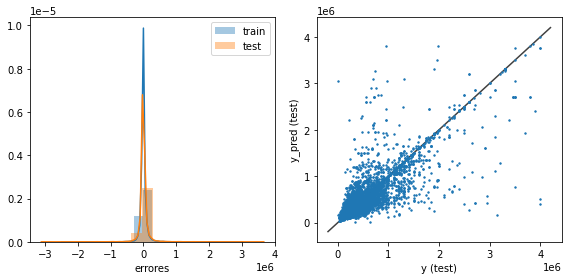

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 131870.5628603422
Raíz del error cuadrático medio en Test: 160394.46940643032


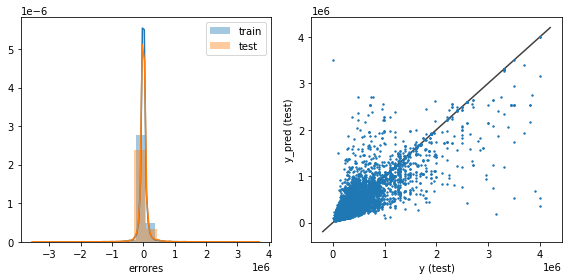

In [63]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([regtree,rg_knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### CONCLUSION DE COMPARACION DE MODELOS
LUEGO DE HABER ELEGIDO LOS HIPERPARAMETROS OPTIMOS, SE PROCEDE A COMPARAR LOS MODELOS. COMPARAR LOS MODELOS NO ES MAS QUE VER QUE TAN LEJOS DE LA REALIDAD ESTAN LOS VALORES PREDICHOS. SE OBSERVA UNA MEJOR APROXIMACION DEL ARBOL DE DECISION YA QUE POSEE MENOR ERROR, Y ADEMAS SE OBSERVA UNA MEJOR DISTRIBUCION DE LOS VALORES PREDICHOS CON EL VALOR REAL (MENOS DISPERSION).
POR OTRO LADO COMO SIMILITUD LOS DOS MODELOS APROXIMAN MEJOR VALORES CUANDO LAS VARIABLES PREDICTORAS TOMAN VALORES MAS PEQUEÑOS.

POR ESTAS RAZONES SE RECOMIENDA UTILIZAR EL MODELO DE ARBOL DE DECISION.


#### CONCLUSION FINAL del proyecto:
a)conclusion acerca de los modelos
- los puntos en los dos modelos muestran una dispersion grande lo cual indica que no estan aproximando de manera correcta el precio de las propiedades, una de las razones por las cuales esto ocurre es que hay una fuerte correlacion relacionada a la ubicacion la cual es una variable categorica y no se esta incorporando en el analisis, por lo cual se confirma la hipotesis. Una opcion para solucionar este sesgo es filtrar los datos acorde a las zonas de capital federal y realizar nuevamente los modelos, seguramente el error se reducira significativamente.(lo dejo como tarea extra para seguir practicando).

b) conclusion acerca del datawranling
- en la etapa donde se realizo el filtrado y eliminacion de valores atipicos de datos, algunas variables reducieron su varianza pero algunas variables como por ejemplo surface_covered mantuvieron valores altos de varianza por lo cual se recomienda hacer un mejor pre-procesamiento de datos.

c) conclusion acerca de correlacion entre variables

- en la etapa donde se analizo la correlacion de las variables se obserbo que el coeficiente de correlacion era bajo por lo cual significa que ademas de no incorporar en el analisis variables cateogricas, esto puede significar tambien que exista una relacion no lineal entre las variables predictoras y el precio. y al no haberse analizado otro tipos de correlaciones, puede haber inducido a una mal eleccion de variables predictoras en el modelo.

d) conclusion personal

- me gusto mucho el proyecto, pude sacar muchas conclusiones de los datos basados en conceptos aprendidos en el curso. y pido disculpas por la redaccion, soy ingeniero y es un tema pendiente mejorar la redaccion y la expresion de ideas.



